# Homework 3 Cohort 2 Group 1
## Yilu Chen, Peilin Liu, Ashutosh Ekade, Gabriel de La Noue

# 1.

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# mean
mu = np.array([0.005, 0.04, 0.075, 0.085, 0.095])

# variance
sd = np.array([0.005, 0.07, 0.16, 0.17, 0.2])

# correlation matrix
corr = np.array([[1,     0.05, -0.05, -0.05, 0.05],
                 [0.05,  1,     0.5,   0.5,  0.5],
                 [-0.05, 0.5,   1,     0.8,  0.7],
                 [-0.05, 0.5,   0.8,   1,    0.9],
                 [0.05,  0.5,   0.7,   0.9,  1]])

In [3]:
N = len(mu)
w0 = np.ones(N) / N
mean0 = np.sum(w0.T @ mu)

 # covariance matrix
cov = np.outer(sd, sd) * corr
sd0 = np.sqrt(w0.T @ cov @ w0)
print("The mean of the equal weighted portfolio is {:.3f}".format(mean0))
print("The standard deviation of the equal weighted portfolio is {:.4f}".format(sd0))

The mean of the equal weighted portfolio is 0.060
The standard deviation of the equal weighted portfolio is 0.1070


# 2.

In [4]:
objective = lambda w: 0.5 * w.T @ cov @ w

constraints = ({'type': 'eq', 'fun': lambda w: sum(w) - 1},
               {'type': 'eq', 'fun': lambda w: w.T @ mu - mean0})

w0 = np.ones(N) / N
res = minimize(objective, w0, method='SLSQP', constraints=constraints, tol=0.000000001)

w1 = res.x
sd1 = np.sqrt(w1.T @ cov @ w1)
print("Portfolio weights of US cash, US bonds, US stock, DM stock, and EM stock is", w1.round(2))
print("The standard deviation of the portfolio is {:.4f}".format(sd1))
print("The risk is {:.4f} lower than equal_weighted portfolio".format(sd0 - sd1))

Portfolio weights of US cash, US bonds, US stock, DM stock, and EM stock is [-0.16  0.84  0.09  0.19  0.05]
The standard deviation of the portfolio is 0.0976
The risk is 0.0093 lower than equal_weighted portfolio


The US bonds dominate this portfolio with a weight of 82%, so the portfolio is not well diversified.

# 3.

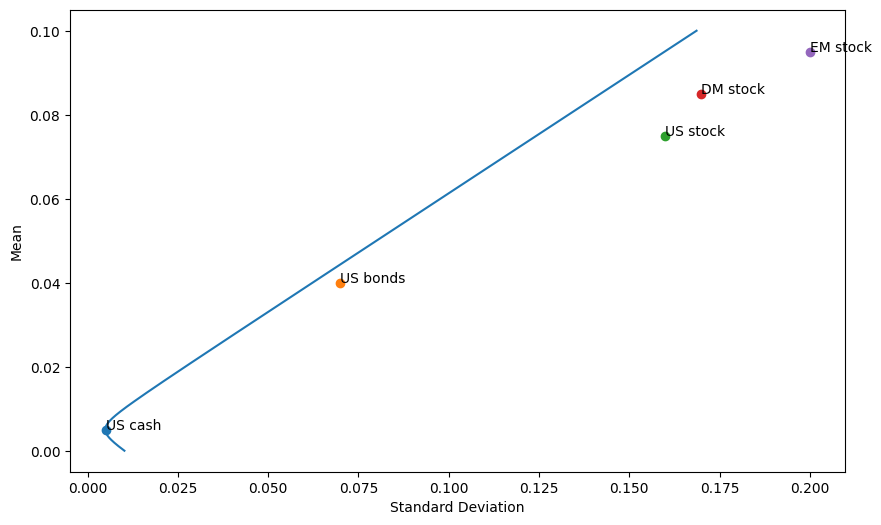

In [5]:
means, sds = [], []
target_mean = 0
while target_mean <= 0.1:
    target_mean += 0.0001
    means.append(target_mean)
    constraints = ({'type': 'eq', 'fun': lambda w: sum(w) - 1},
                   {'type': 'eq', 'fun': lambda w: w.T @ mu - target_mean})
    w0 = np.ones(N) / N
    res = minimize(objective, w0, method='SLSQP', constraints=constraints, tol=0.000000001)
    sds.append(np.sqrt(res.x.T @ cov @ res.x))
    
plt.figure(figsize=(10, 6))
plt.plot(sds, means)

for i, asset in enumerate(['US cash', 'US bonds', 'US stock', 'DM stock', 'EM stock']):
    plt.scatter(sd[i], mu[i])
    plt.text(sd[i], mu[i],asset)

plt.ylabel('Mean')
plt.xlabel('Standard Deviation')
plt.show()

In [6]:
weights = []
means = []
sds = []
for target_mean in [0.02, 0.03, 0.04, 0.05, 0.06, 0.07]:
    means.append(target_mean)
    constraints = ({'type': 'eq', 'fun': lambda w: sum(w) - 1},
                   {'type': 'eq', 'fun': lambda w: w.T @ mu - target_mean})
    w0 = np.ones(N) / N
    res = minimize(objective, w0, method='SLSQP', constraints=constraints, tol=0.000000001)
    w = res.x.round(3)
    weights.append(w)
    sd = np.sqrt(res.x.T @ cov @ res.x)
    sds.append(sd.round(2))
    print("Mean: {:.2f}, Standard Deviation: {:.4f}, Weights: {}".format(target_mean, sd, w))

Mean: 0.02, Standard Deviation: 0.0269, Weights: [0.682 0.227 0.023 0.063 0.004]
Mean: 0.03, Standard Deviation: 0.0445, Weights: [0.47  0.383 0.041 0.086 0.021]
Mean: 0.04, Standard Deviation: 0.0622, Weights: [0.259 0.533 0.054 0.124 0.029]
Mean: 0.05, Standard Deviation: 0.0799, Weights: [0.048 0.686 0.07  0.155 0.041]
Mean: 0.06, Standard Deviation: 0.0976, Weights: [-0.163  0.839  0.085  0.187  0.053]
Mean: 0.07, Standard Deviation: 0.1154, Weights: [-0.375  0.992  0.101  0.218  0.064]


# 4.

In [7]:
constraints_1 = ({'type': 'eq', 'fun': lambda w: sum(w) - 1})

w0 = np.ones(N) / N
res = minimize(objective, w0, method='SLSQP', constraints=constraints_1, tol=0.000000001)

w2 = res.x
mean2 = w2.T @ mu
sd2 = np.sqrt(w2.T @ cov @ w2)
print("The mean of the global minimum-variance portfolio is {:.3f}".format(mean2))
print("The standard deviation of the global minimum-variance portfolio {:.4f}".format(sd2))

The mean of the global minimum-variance portfolio is 0.005
The standard deviation of the global minimum-variance portfolio 0.0049


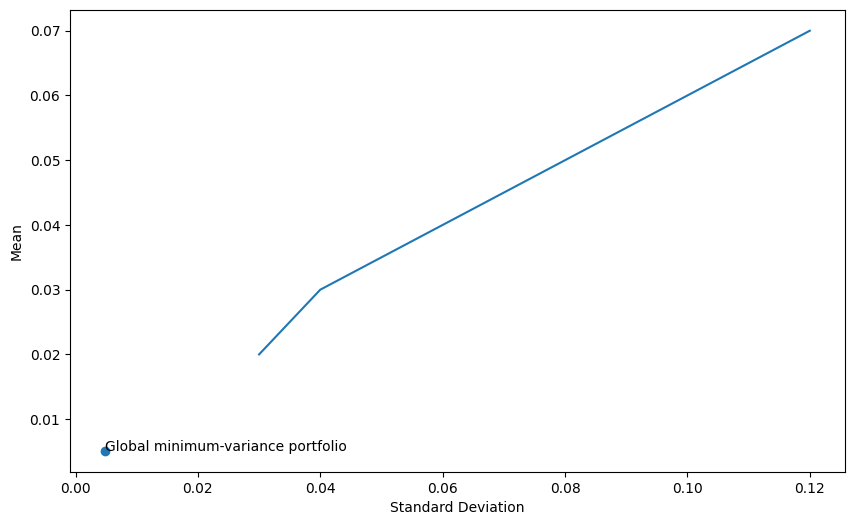

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(sds, means)

plt.scatter(sd2, mean2)
plt.text(sd2, mean2, 'Global minimum-variance portfolio')

plt.ylabel('Mean')
plt.xlabel('Standard Deviation')
plt.show()

The location in the plot makes sense because it is located on the minimum-variance frontier. As shown is the figure, the point of the global minimum-variance portfolio does represent the point with the smallest standard deviation.

# 5.

IndexError: invalid index to scalar variable.

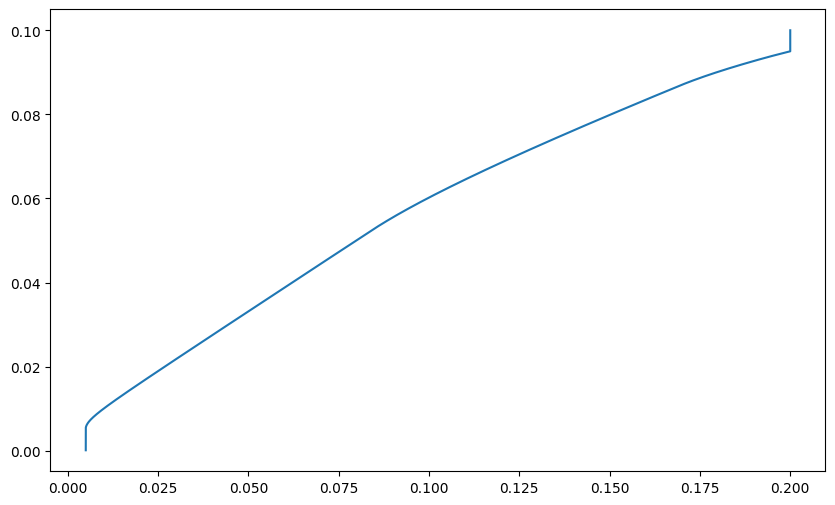

In [9]:
means, sds = [], []
target_mean = 0
while target_mean <= 0.1:
    target_mean += 0.0001
    means.append(target_mean)
    constraints = ({'type': 'eq', 'fun': lambda w: sum(w) - 1},
                   {'type': 'eq', 'fun': lambda w: w.T @ mu - target_mean})
    bnds = ((0,1),) * N
    w0 = np.ones(N) / N
    res = minimize(objective, w0, method='SLSQP', constraints=constraints, bounds=bnds, tol=0.000000001)
    sds.append(np.sqrt(res.x.T @ cov @ res.x))
    
plt.figure(figsize=(10, 6))
plt.plot(sds, means)

for i, asset in enumerate(['US cash', 'US bonds', 'US stock', 'DM stock', 'EM stock']):
    plt.scatter(sd[i], mu[i])
    plt.text(sd[i], mu[i],asset)

plt.ylabel('Mean')
plt.xlabel('Standard Deviation')
plt.show()

In [ ]:
weights = []
means = []
sds = []
for target_mean in [0.02, 0.03, 0.04, 0.05, 0.06, 0.07]:
    means.append(target_mean)
    constraints = ({'type': 'eq', 'fun': lambda w: sum(w) - 1},
                   {'type': 'eq', 'fun': lambda w: w.T @ mu - target_mean})
    bnds = ((0,1),) * N
    w0 = np.ones(N) / N
    res = minimize(objective, w0, method='SLSQP', constraints=constraints, bounds=bnds, tol=0.000000001)
    w = res.x.round(3)
    weights.append(w)
    sd = np.sqrt(res.x.T @ cov @ res.x)
    sds.append(sd.round(2))
    print("Mean: {:.2f}, Standard Deviation: {:.4f}, Weights: {}".format(target_mean, sd, w))

Mean: 0.02, Standard Deviation: 0.0269, Weights: [0.683 0.226 0.025 0.059 0.007]
Mean: 0.03, Standard Deviation: 0.0445, Weights: [0.47  0.383 0.041 0.086 0.021]
Mean: 0.04, Standard Deviation: 0.0622, Weights: [0.259 0.533 0.054 0.124 0.029]
Mean: 0.05, Standard Deviation: 0.0799, Weights: [0.048 0.686 0.07  0.155 0.041]
Mean: 0.06, Standard Deviation: 0.0995, Weights: [0.    0.559 0.114 0.195 0.131]
Mean: 0.07, Standard Deviation: 0.1237, Weights: [0.    0.351 0.17  0.23  0.249]


Since there is a short sell constraint, for the same traget mean, the standard deviations sometimes are larger than before and there may even not exist an efficient combination because there are more constraints for the optimization process.

# 6.

In [ ]:
mu_1 = np.array([0.005, 0.04, 0.08, 0.08, 0.095])

constraints = ({'type': 'eq', 'fun': lambda w: sum(w) - 1},
               {'type': 'eq', 'fun': lambda w: w.T @ mu_1 - mean0})

w0 = np.ones(N) / N
res = minimize(objective, w0, method='SLSQP', constraints=constraints, tol=0.000000001)

w1 = res.x
sd1 = np.sqrt(w1.T @ cov @ w1)
print("Portfolio weights of US cash, US bonds, US stock, DM stock, and EM stock is", w1.round(2))
print("The standard deviation of the portfolio is {:.4f}".format(sd1))

Portfolio weights of US cash, US bonds, US stock, DM stock, and EM stock is [-0.12  0.79  0.26 -0.11  0.19]
The standard deviation of the portfolio is 0.0964


From the difference of the weights, we can see that the new portfolio is to long more US stock and the position of DM stock changes to long from short. It makes sense since we have changed the mean assumptions by adding 0.5% to US stocks and subtracting 0.5% to DM stocks. And the standard deviation of the new portfolio is lower than before, which is because that firstly, the portfolio shorts less US cash and secondly, the weight of US stock plus the weight of DM stock is lower than before and the mean and variance of the two are similar, so there is more long-short hedging.